In [1]:
%load_ext autoreload
%autoreload 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
import ControlBurn as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cm
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.linear_model import LogisticRegression as lr
from sklearn.linear_model import RidgeClassifier as rc
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

In [4]:
df_rain = pd.read_csv('datasets/benchmark/wine_train.csv')
rain_feats = df_rain.columns.values
rain_x = df_rain.loc[:, df_rain.columns != "quality"]
rain_x = df_rain.loc[:, df_rain.columns != "Unnamed: 0"]
rain_y = df_rain.loc[:, df_rain.columns == "quality"]
rain_x_tr, rain_x_te, rain_y_tr, rain_y_te = train_test_split(rain_x, rain_y, test_size=0.2)

In [5]:
# rain_norm_x = rain_x - rain_x.min()
# rain_norm_x /= (rain_norm_x.max() - rain_norm_x.min())
rain_norm_x = rain_x - rain_x.mean()
rain_norm_x_tr, rain_norm_x_te, rain_norm_y_tr, rain_norm_y_te = train_test_split(rain_norm_x, rain_y, test_size=0.2)

In [6]:
df_rain['quality'].max()

1

In [7]:
rain_x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.0,0.18,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7,1
1,7.5,0.58,0.20,2.0,0.073,34.0,44.0,0.99494,3.10,0.43,9.3,0
2,6.4,0.53,0.09,3.9,0.123,14.0,31.0,0.99680,3.50,0.67,11.0,0
3,6.6,0.61,0.01,1.9,0.080,8.0,25.0,0.99746,3.69,0.73,10.5,0
4,6.8,0.59,0.06,6.0,0.060,11.0,18.0,0.99620,3.41,0.59,10.8,1


In [8]:
rain_norm_x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.313683,-0.347099,0.099945,-1.62326,-0.038938,20.186865,62.985145,-0.006657,-0.421118,-0.217177,2.259851,0.465989
1,-0.813683,0.052901,-0.070055,-0.52326,-0.014938,18.186865,-2.014855,-0.001787,-0.211118,-0.227177,-1.140149,-0.534011
2,-1.913683,0.002901,-0.180055,1.37674,0.035062,-1.813135,-15.014855,0.000073,0.188882,0.012823,0.559851,-0.534011
3,-1.713683,0.082901,-0.260055,-0.62326,-0.007938,-7.813135,-21.014855,0.000733,0.378882,0.072823,0.059851,-0.534011
4,-1.513683,0.062901,-0.210055,3.47674,-0.027938,-4.813135,-28.014855,-0.000527,0.098882,-0.067177,0.359851,0.465989


In [9]:
rain_norm_x.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03
mean,-1.119424e-15,-1.027759e-16,1.909688e-18,1.708303e-16,-4.166591e-18,-3.999928e-16,1.466640e-15,-5.668301e-17,1.374975e-16,1.423585e-17,-3.722155e-16,1.874966e-17
std,1.736096e+00,1.775655e-01,1.960085e-01,1.364626e+00,4.893663e-02,1.044601e+01,3.243713e+01,1.879369e-03,1.546572e-01,1.665730e-01,1.063096e+00,4.990370e-01
min,-3.713683e+00,-4.070993e-01,-2.700547e-01,-1.623260e+00,-7.593823e-02,-1.481314e+01,-4.001486e+01,-6.656919e-03,-5.711181e-01,-3.271775e-01,-2.040149e+00,-5.340109e-01
25%,-1.213683e+00,-1.370993e-01,-1.800547e-01,-6.232604e-01,-1.793823e-02,-8.813135e+00,-2.401486e+01,-1.136919e-03,-1.011181e-01,-1.071775e-01,-9.401486e-01,-5.340109e-01
50%,-4.136826e-01,-7.099296e-03,-1.005473e-02,-3.232604e-01,-8.938233e-03,-1.813135e+00,-8.014855e+00,-2.691947e-05,-1.118061e-03,-3.717748e-02,-2.401486e-01,4.659891e-01
75%,8.863174e-01,1.104007e-01,1.599453e-01,7.673964e-02,3.061767e-03,5.186865e+00,1.598514e+01,1.073081e-03,8.888194e-02,6.782252e-02,6.598514e-01,4.659891e-01
max,7.586317e+00,1.052901e+00,7.299453e-01,1.297674e+01,5.230618e-01,5.618686e+01,2.429851e+02,6.963081e-03,6.988819e-01,1.342823e+00,4.459851e+00,4.659891e-01


In [10]:
rain_feats

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [11]:
U, S, V = np.linalg.svd(rain_x_tr[:5000])
Un, Sn, Vn = np.linalg.svd(rain_norm_x_tr[:5000])

[1.90783817e+03 2.99624921e+02 2.08726609e+02 4.93483044e+01
 4.02748457e+01 1.55752227e+01 1.00191948e+01 6.03070496e+00
 4.61900792e+00 3.19560055e+00 1.40151564e+00 8.14235477e-01]


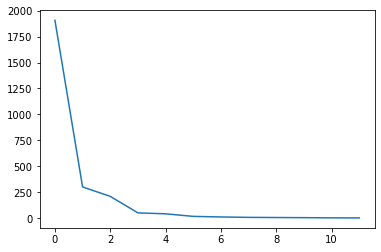

In [12]:
print(S)
plt.plot(S)
# demonstrate features selected by PCA would do poorly in RF but do well with lasso
# normalize every feature and try again

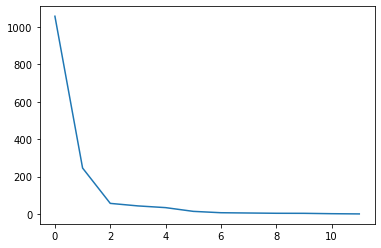

In [13]:
Sn
plt.plot(Sn)

In [14]:
clf = lr(penalty='l2').fit(rain_x_tr, rain_y_tr)
print(clf.score(rain_x_te, rain_y_te)) # clf.score(rain_x_te_true, rain_y_te_true), clf.score(rain_x_te_false, rain_y_te_false))
print('Coefficients:', clf.coef_)

1.0
Coefficients: [[-0.05501195 -0.29394632 -0.01282979 -0.05507452 -0.15955282  0.0144722
  -0.00951693 -0.34120049 -0.80894108 -0.01925423  0.25552179  8.10652629]]


C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [15]:
clf = lr(penalty='l1', solver='liblinear').fit(rain_x_tr, rain_y_tr)
print(clf.score(rain_x_te, rain_y_te))# , clf.score(rain_x_te_true, rain_y_te_true), clf.score(rain_x_te_false, rain_y_te_false))
print('Coefficients:', clf.coef_)

1.0
Coefficients: [[-1.96052768e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -3.23584509e-03 -9.47084611e-03  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -3.89452432e-01  1.27802208e+01]]


C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [16]:
# run pca for different numbers of output features, see how loss changes
# comparison with lasso (ridge)
# and RF to see loss progression
rain_norm_x_tr.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,-0.005276,0.002036,-0.000671,0.019604,0.000079,0.070051,-0.392177,-0.000028,0.000778,-0.001742,0.023846,-0.011039
std,1.744431,0.181573,0.197588,1.391629,0.047919,10.587710,32.231699,0.001888,0.155892,0.170590,1.063606,0.499716
min,-3.713683,-0.407099,-0.270055,-1.623260,-0.075938,-13.813135,-40.014855,-0.006657,-0.571118,-0.327177,-2.040149,-0.534011
25%,-1.213683,-0.137099,-0.185055,-0.623260,-0.017938,-8.813135,-24.014855,-0.001192,-0.101118,-0.107177,-0.881815,-0.534011
50%,-0.413683,-0.007099,-0.010055,-0.323260,-0.008938,-1.813135,-9.014855,-0.000067,0.008882,-0.037177,-0.240149,0.465989
75%,0.886317,0.112901,0.159945,0.076740,0.003062,6.186865,13.985145,0.001093,0.088882,0.062823,0.759851,0.465989
max,7.586317,1.052901,0.729945,12.976740,0.522062,52.186865,242.985145,0.006963,0.698882,1.342823,4.459851,0.465989


In [30]:
cmatrices = []
cmatricesn = []
scores = []
scoresn = []
for i in range(1, 12):
    pca = PCA(n_components=i)
    pcan = PCA(n_components=i)
    pca.fit(rain_x_tr)
    pcan.fit(rain_norm_x_tr)
    
    clf = lr(penalty='l2').fit(pca.transform(rain_x_tr), rain_y_tr)
    clfn = lr(penalty='l2').fit(pcan.transform(rain_norm_x_tr), rain_y_tr)
    
    cmatrices.append(cm(rain_y_te, clf.predict(pca.transform(rain_x_te))))
    cmatricesn.append(cm(rain_norm_y_te, clfn.predict(pcan.transform(rain_norm_x_te))))
    
    scores.append(clf.score(pca.transform(rain_x_te), rain_y_te))
    scoresn.append(clfn.score(pcan.transform(rain_norm_x_te), rain_norm_y_te))

C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

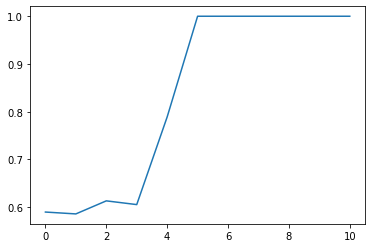

In [31]:
plt.plot(scores)

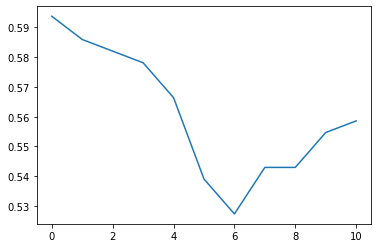

In [32]:
plt.plot(scoresn)

In [33]:
cmatricesn

[array([[  6, 102],
        [  2, 146]], dtype=int64),
 array([[  5, 103],
        [  3, 145]], dtype=int64),
 array([[  5, 103],
        [  4, 144]], dtype=int64),
 array([[  6, 102],
        [  6, 142]], dtype=int64),
 array([[  4, 104],
        [  7, 141]], dtype=int64),
 array([[  4, 104],
        [ 14, 134]], dtype=int64),
 array([[  4, 104],
        [ 17, 131]], dtype=int64),
 array([[  7, 101],
        [ 16, 132]], dtype=int64),
 array([[  4, 104],
        [ 13, 135]], dtype=int64),
 array([[  4, 104],
        [ 10, 138]], dtype=int64),
 array([[  5, 103],
        [ 10, 138]], dtype=int64)]

In [34]:
cmatrices = []
cmatricesn = []
scores = []
scoresn = []
for i in range(1, 12):
    pca = KernelPCA(n_components=i, kernel='poly')
    pcan = KernelPCA(n_components=i, kernel='poly')
    pca.fit(rain_x_tr[:5000])
    pcan.fit(rain_norm_x_tr[:5000])
    
    clf = lr(penalty='l2').fit(pca.transform(rain_x_tr), rain_y_tr)
    clfn = lr(penalty='l2').fit(pcan.transform(rain_norm_x_tr), rain_y_tr)
    
    cmatrices.append(cm(rain_y_te, clf.predict(pca.transform(rain_x_te))))
    cmatricesn.append(cm(rain_norm_y_te, clfn.predict(pcan.transform(rain_norm_x_te))))
    
    scores.append(clf.score(pca.transform(rain_x_te), rain_y_te))
    scoresn.append(clfn.score(pcan.transform(rain_norm_x_te), rain_norm_y_te))

C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS RE

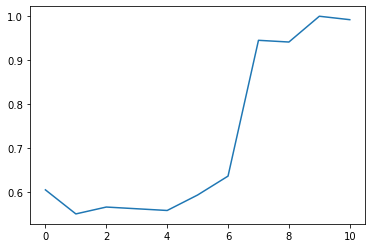

In [35]:
plt.plot(scores)

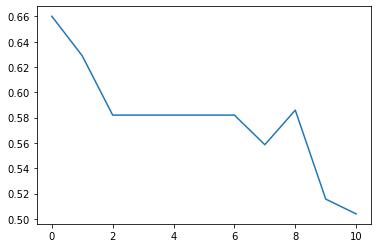

In [36]:
plt.plot(scoresn)

In [37]:
cmatrices = []
cmatricesn = []
scores = []
scoresn = []
for i in range(1, 12):
    pca = KernelPCA(n_components=i, kernel='rbf')
    pcan = KernelPCA(n_components=i, kernel='rbf')
    pca.fit(rain_x_tr[:5000])
    pcan.fit(rain_norm_x_tr[:5000])
    
    clf = lr(penalty='l2').fit(pca.transform(rain_x_tr), rain_y_tr)
    clfn = lr(penalty='l2').fit(pcan.transform(rain_norm_x_tr), rain_y_tr)
    
    cmatrices.append(cm(rain_y_te, clf.predict(pca.transform(rain_x_te))))
    cmatricesn.append(cm(rain_norm_y_te, clfn.predict(pcan.transform(rain_norm_x_te))))
    
    scores.append(clf.score(pca.transform(rain_x_te), rain_y_te))
    scoresn.append(clfn.score(pcan.transform(rain_norm_x_te), rain_norm_y_te))

C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

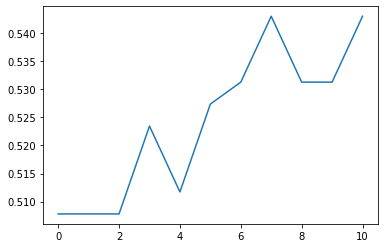

In [38]:
plt.plot(scores)

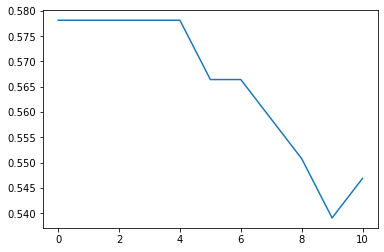

In [39]:
plt.plot(scoresn)